In [1]:
import pandas as pd
df = pd.DataFrame()
df["年份"] = [i for i in  range(1790,2010,10)]
df["人口"] = [3.9,5.3,7.2,9.6,12.9,17.1,23.2,31.4,38.6,
50.2,62.9,76,92,106.5,123.2,131.7,150.7,179.3,204,226.5,251.4,281.4]
df.T

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
年份,1790.0,1800.0,1810.0,1820.0,1830.0,1840.0,1850.0,1860.0,1870.0,1880.0,...,1910.0,1920.0,1930.0,1940.0,1950.0,1960.0,1970.0,1980.0,1990.0,2000.0
人口,3.9,5.3,7.2,9.6,12.9,17.1,23.2,31.4,38.6,50.2,...,92.0,106.5,123.2,131.7,150.7,179.3,204.0,226.5,251.4,281.4


Text(0, 0.5, 'Population(Million)')

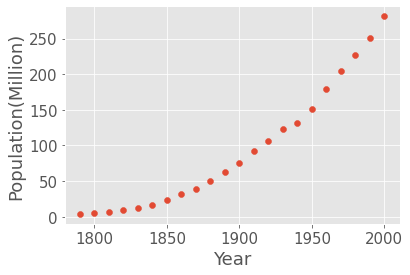

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')  #设置绘图风格为ggplot
matplotlib.rcParams['font.size'] = 15  #设置全文绘图字体大小为15号字

year = [i for i in range(1790,2010,10)]
population = [3.9,5.3,7.2,9.6,12.9,17.1,23.2,31.4,38.6,
50.2,62.9,76,92,106.5,123.2,131.7,150.7,179.3,204,226.5,251.4,281.4]
plt.scatter(year,population)   #绘制散点图
plt.xlabel("Year")
plt.ylabel("Population(Million)")

Text(0, 0.5, 'Population')

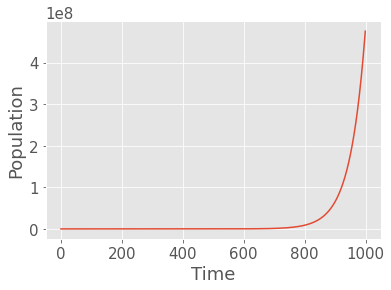

In [3]:
# 指数增长模型的绘图
import numpy as np
x0 = 1  # 初始人口数
r = 0.02    # 增长率
t = [i for i in range(1000)] # 时间列表
x_t = [x0 * np.exp(r * time) for time in t] # 人口增长记录
plt.plot(t, x_t) # 绘图
plt.xlabel("Time") # 加横坐标label
plt.ylabel("Population") # 加纵坐标label

Text(0, 0.5, '$\\ln(x)$')

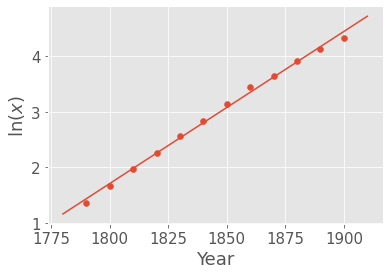

In [4]:
from sklearn.linear_model import LinearRegression # 导入LinearRegression方法
ln_population = np.log(population)  # 对人口取对数，得到y
plt.scatter(year[0:12],ln_population[0:12])  # 绘制1790 - 1900的y-t图，并进行线性回归

## 使用LinearRegression 进行线性回归
lrModel = LinearRegression()
lrModel.fit(np.array(year[0:12]).reshape(-1,1),ln_population[0:12])
ln_population_fit = [ lrModel.intercept_  +  lrModel.coef_  *i for i in range(1780,1920,10)  ]
plt.plot(range(1780,1920,10),ln_population_fit) # 将线性回归以后的直线绘制在散点图上
plt.xlabel("Year")
plt.ylabel(r'$\ln(x)$')

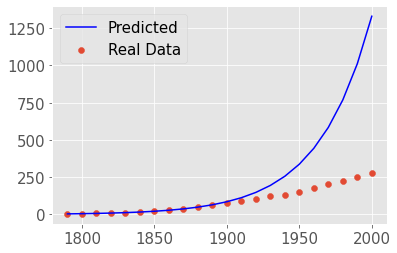

In [5]:
## 我们把以上的代码合起来，放在一起。
## 对比一个世纪后的预测值和真实值

#输入原始数据
year = [i for i in range(1790,2010,10)]
population = [3.9,5.3,7.2,9.6,12.9,17.1,23.2,31.4,38.6,
50.2,62.9,76,92,106.5,123.2,131.7,150.7,179.3,204,226.5,251.4,281.4]  
plt.scatter(year,population,label = 'Real Data')

#进行参数的线性拟合
from sklearn.linear_model import LinearRegression
ln_population = np.log(population)
lrModel = LinearRegression()
lrModel.fit(np.array(year[0:12]).reshape(-1,1),ln_population[0:12])
ln_population_fit = [ lrModel.intercept_  +  lrModel.coef_  *i for i in range(1780,1920,10)  ]

#将预测值和真实值进行对比
r = lrModel.coef_
x0 = np.exp(lrModel.intercept_)
pop_predicted = [x0 * np.exp(lrModel.coef_ * time) for time in year]
plt.plot(year,pop_predicted,'b',label = 'Predicted')
plt.legend()

Text(0, 0.5, '$r$')

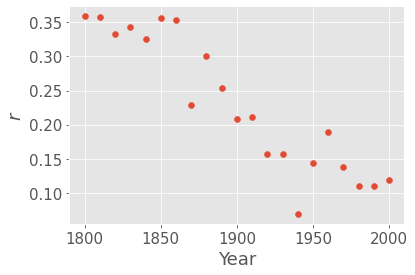

In [6]:
## 增长率可视化
year = [i for i in range(1790,2010,10)]
population = [3.9,5.3,7.2,9.6,12.9,17.1,23.2,31.4,38.6,
50.2,62.9,76,92,106.5,123.2,131.7,150.7,179.3,204,226.5,251.4,281.4]
## 计算增长率
rate = []
for i in range(len(population)-1):
    rate.append((population[i+1] - population[i])/ population[i])
## 可视化
plt.scatter(year[1:],rate)
plt.xlabel("Year")
plt.ylabel(r'$r$')

Text(0, 0.5, '$\\frac{\\mathrm{d}x}{\\mathrm{d}t}$')

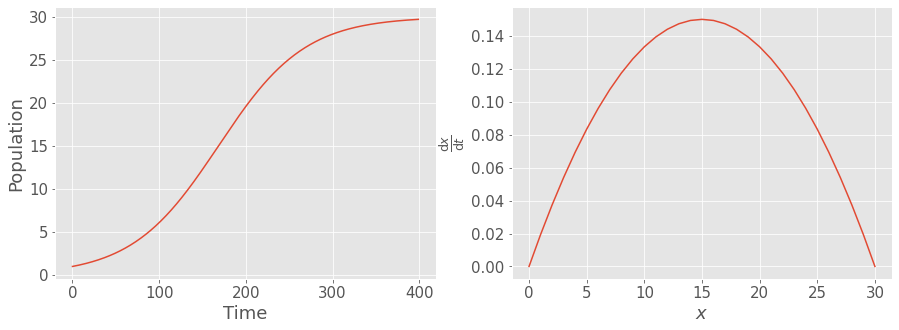

In [7]:
## 阻滞增长模型的绘图

## 输入初始参数
x0 = 1
xm = 30
r = 0.02

# 获得x 和 f(x)
t = [i for i in range(400)]
x_t = [xm * (1 + (xm/x0 -1)*np.exp(- r * time))**(-1) for time in t] 

# 绘图1:增长曲线
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(t,x_t)
plt.xlabel("Time")
plt.ylabel("Population")

# 绘图2:增长速度
plt.subplot(1,2,2)
x = [xm*i/30 for i in range(31) ]
deri_x = [r * xx * (1 - xx/xm) for xx in x]
plt.plot(x,deri_x)
plt.xlabel(r'$x$')
plt.ylabel(r'$\frac{\mathrm{d}x}{\mathrm{d}t}$')

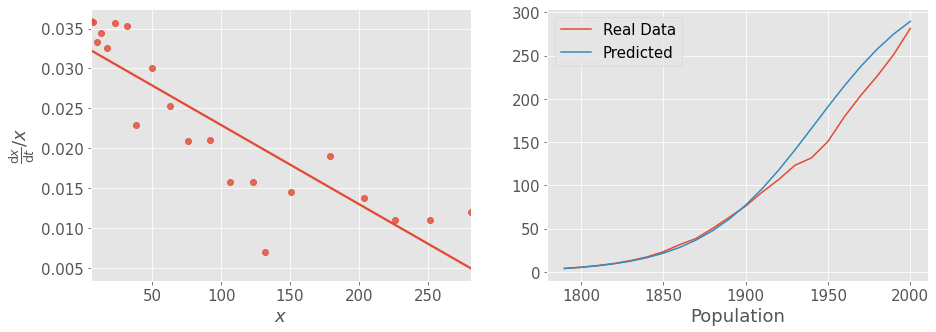

In [8]:
## 对比一个世纪后的预测值和真实值
import seaborn as sns
from sklearn.linear_model import LinearRegression

# 输入初始数据
year = [i for i in range(1790,2010,10)]
population = [3.9,5.3,7.2,9.6,12.9,17.1,23.2,31.4,38.6,
50.2,62.9,76,92,106.5,123.2,131.7,150.7,179.3,204,226.5,251.4,281.4]
y = []
for i in range(len(population)-1):
    y.append( (population[i+1] - population[i])/10 / population[i]  )
plt.figure(figsize = (15,5))

# 可视化线性回归结果
plt.subplot(1,2,1)
sns.regplot(population[1:],y,ci = 0)
plt.ylabel(r'$\frac{\mathrm{d}x}{\mathrm{d}t}/{x}$')
plt.xlabel(r'$x$')
lrModel = LinearRegression()
lrModel.fit(np.array(population[7:-1]).reshape(-1,1),y[6:-1])
r = lrModel.intercept_
xm = r/(- lrModel.coef_)


# 可视化拟合结果
plt.subplot(1,2,2)
x0 = population[0]
plt.plot(year,population,label = 'Real Data')
pop_predicted = [xm * (1 + (xm/x0 -1)*np.exp(- r * (time - 1790)))**(-1) for time in year]
plt.plot(year,pop_predicted,label = 'Predicted')
plt.xlabel('Year')
plt.xlabel('Population')
plt.legend()

/opt/anaconda3/envs/qe-mini-example/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


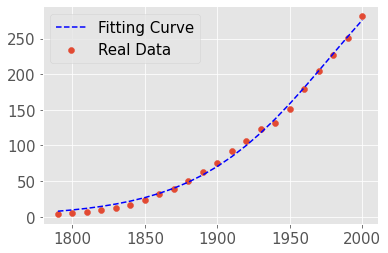

In [9]:
## 复习前面学到的预测模型中的非线性拟合
plt.scatter(year,population,label = 'Real Data')
def logistic(t,xm,x0,r):
    return xm * (1 + (xm/x0 -1)*np.exp(- r * (t-1790) ))**(-1)
from scipy.optimize import curve_fit 
#popt1, pcov1 = curve_fit(logistic, year, population,p0 = [1,0,0]) 
popt1, pcov1 = curve_fit(logistic, year, population,p0 = [1,1,1]) 

#popt数组中，三个值分别是待求参数a,b,c  
y2 = [logistic(i, popt1[0],popt1[1],popt1[2]) for i in year]
plt.plot(year,y2,'b--',label = 'Fitting Curve')  
plt.legend()

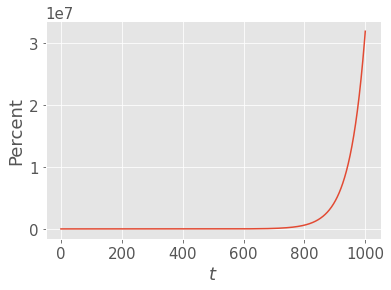

In [10]:
def exp():
    # 输入计算参数
    deltaT = 0.01
    lamb = 2
    i_list = []
    i0 = 0.08; # 初始有8%的人患病
    i_list.append(i0)
    Tot_Time = 10
    TotStep = int(Tot_Time/deltaT)
    ## 递推地求解差分方程
    for i in range(TotStep):
        i_new = i_list[-1] + lamb * i_list[-1] * deltaT
        i_list.append(i_new)
    # 绘图
    plt.plot(i_list)
    plt.xlabel(r"$t$")
    plt.ylabel('Percent')
exp()

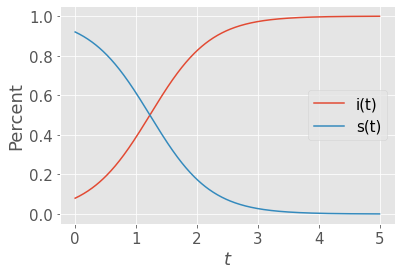

In [11]:
def SI():
    # 输入计算参数
    deltaT = 0.01
    lamb = 2
    i_list = []
    s_list = []
    i0 = 0.08; # 初始有8%的人患病
    i_list.append(i0)
    s_list.append(1 - i0)
    Tot_Time =5
    TotStep = int(Tot_Time/deltaT)
    ## 递推地求解差分方程
    for i in range(TotStep):
        i_new = i_list[-1] + lamb * i_list[-1] * deltaT * s_list[-1]
        i_list.append(i_new)
        s_list.append(1- i_new)
    Time = [i * deltaT for i in range(TotStep + 1)]
    ## 可视化传染过程
    plt.plot(Time,i_list,label = 'i(t)')
    plt.plot(Time,s_list,label = 's(t)')
    plt.xlabel(r"$t$")
    plt.ylabel('Percent')
    plt.legend()
SI()

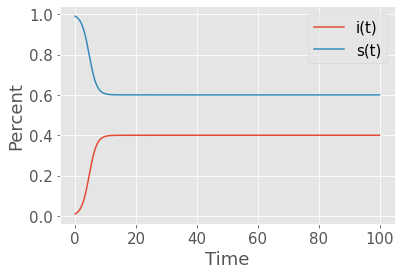

In [12]:
import matplotlib.pyplot as plt
def SIS():
    i0 = 0.01; # 初始有1%的人感染
    lamb = 2
    s0 =  1- i0;
    mu = 1.2;
    i_list = []
    s_list = []
    i_list.append(i0)
    s_list.append(s0)
    TotTime = 100
    TimeStep = 0.01
    TotStep = int(TotTime/TimeStep)
    ## 递推地求解差分方程
    for i in range(TotStep):
        i_new = i_list[-1] + lamb * s_list[-1] * i_list[-1]*TimeStep - mu *  i_list[-1]*TimeStep
        i_list.append(i_new)
        s_list.append(1-i_new)
    Time = [TimeStep * i for i in range(TotStep+1)]
    ## 可视化传染过程
    plt.plot(Time,i_list)
    plt.plot(Time,s_list)
    plt.xlabel("Time")
    plt.ylabel("Percent")
    plt.legend(["i(t)","s(t)"])
SIS()

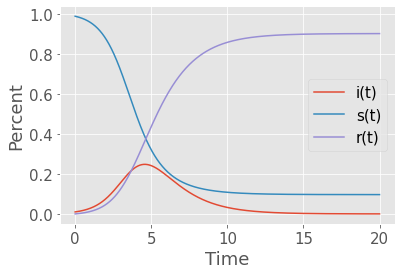

In [13]:
def SIR():
    i0 = 0.01; # 初始有1%的人感染
    r0 = 0;# 初始没有人免疫
    lamb = 1.8
    s0 =  1- i0;
    mu = 0.7;
    i_list = []
    s_list = []
    r_list = []
    i_list.append(i0)
    s_list.append(s0)
    r_list.append(r0)
    TotTime = 20
    TimeStep = 0.01
    TotStep = int(TotTime/TimeStep)
    ## 递推地求解差分方程
    for i in range(TotStep):
        i_new = i_list[-1] + lamb * s_list[-1] * i_list[-1]*TimeStep - mu *  i_list[-1]*TimeStep
        s_new = s_list[-1] - lamb * s_list[-1] * i_list[-1]*TimeStep
        i_list.append(i_new)
        s_list.append(s_new)
        r_list.append(1-i_new-s_new)
    Time = [TimeStep * i for i in range(TotStep+1)]
    ## 可视化传染过程
    plt.plot(Time,i_list)
    plt.plot(Time,s_list)
    plt.plot(Time,r_list)
    plt.xlabel("Time")
    plt.ylabel("Percent")
    plt.legend(["i(t)","s(t)","r(t)"])
SIR()

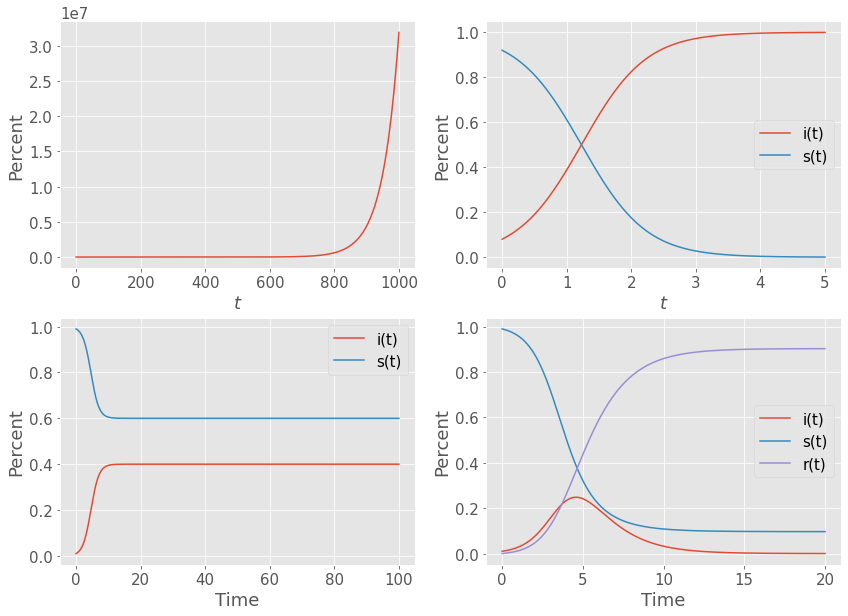

In [14]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
exp()
plt.subplot(2,2,2)
SI()
plt.subplot(2,2,3)
SIS()
plt.subplot(2,2,4)
SIR()

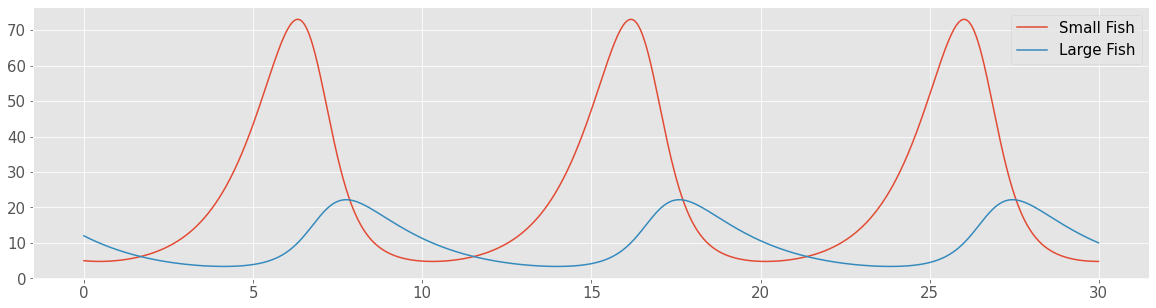

In [15]:
## Volterra 模型的数值求解示例

# 输入初始参数
r = 1
d = 0.5
a = 0.1
b = 0.02
x0 = 5
y0 = 12
deltaT = 0.01
TotTime = 30
timeStep = TotTime/deltaT
xlist = []
ylist = []
xlist.append(x0)
ylist.append(y0)
TimeList = [i*deltaT for i in range(int(timeStep))]

# 递推地求解差分方程
for time in TimeList:
    xlist.append(xlist[-1] +deltaT * (r *xlist[-1] - a*xlist[-1]*ylist[-1] ) )
    ylist.append(ylist[-1] +deltaT * (-d *ylist[-1] + b*xlist[-1]*ylist[-1] ) )
# 变化过程可视化
plt.figure(figsize = (20,5))
plt.plot(TimeList,xlist[:-1],label = 'Small Fish')
plt.plot(TimeList,ylist[:-1],label = 'Large Fish')
plt.legend()

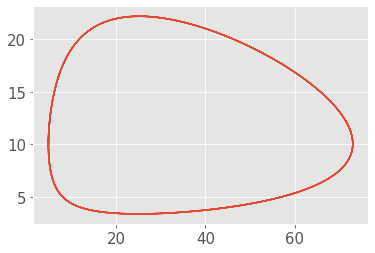

In [16]:
# 绘制相轨线
plt.plot(xlist,ylist)

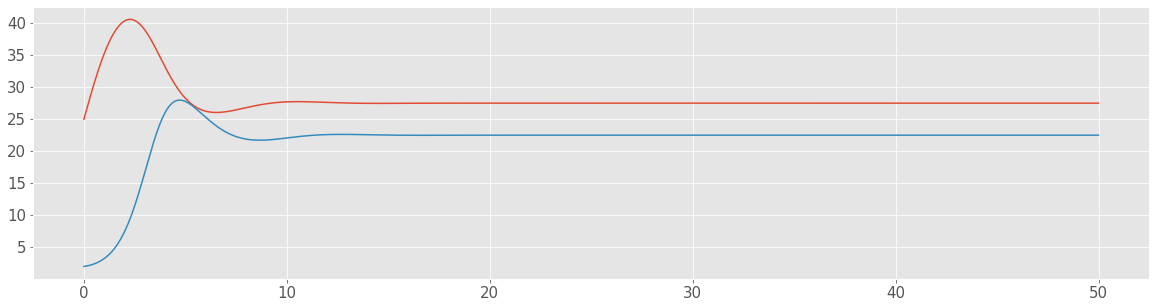

In [17]:
## 加入logistic项的Volterra模型

# 输入初始参数
r1 = 0.2
r2 = 0.1
N1 = 50
N2 = 60
sigma1 = 1.2
sigma2 = 2.5
x0 = 25
y0 = 2
deltaT = 0.01
TotTime = 50
timeStep = TotTime/deltaT
xlist = []
ylist = []
xlist.append(x0)
ylist.append(y0)
TimeList = [i*deltaT for i in range(int(timeStep))]

# 递推地求解差分方程
for time in TimeList:
    xlist.append(xlist[-1] +deltaT * (r *xlist[-1])*(1 - xlist[-1]/N1 - sigma1 * ylist[-1]/N2))
    ylist.append(ylist[-1] +deltaT * (r *ylist[-1])*(-1 +sigma2* xlist[-1]/N1 -  ylist[-1]/N2))

# 结果可视化
plt.figure(figsize = (20,5))
plt.plot(TimeList,xlist[:-1])
plt.plot(TimeList,ylist[:-1])